In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv(r'C:\Users\georg\OneDrive\Desktop\housing_in_london_monthly_variables.csv')
print(df)


             date            area  average_price       code  houses_sold  \
0      1995-01-01  city of london          91449  E09000001         17.0   
1      1995-02-01  city of london          82203  E09000001          7.0   
2      1995-03-01  city of london          79121  E09000001         14.0   
3      1995-04-01  city of london          77101  E09000001          7.0   
4      1995-05-01  city of london          84409  E09000001         10.0   
...           ...             ...            ...        ...          ...   
13544  2019-09-01         england         249942  E92000001      64605.0   
13545  2019-10-01         england         249376  E92000001      68677.0   
13546  2019-11-01         england         248515  E92000001      67814.0   
13547  2019-12-01         england         250410  E92000001          NaN   
13548  2020-01-01         england         247355  E92000001          NaN   

       no_of_crimes  borough_flag  
0               NaN             1  
1              

In [2]:
#print info on data frame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [3]:
#print types of each column
df.dtypes


date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
borough_flag       int64
dtype: object

In [4]:
#print column names
df.columns


Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag'],
      dtype='object')

In [5]:
#print shape of data
df.shape

(13549, 7)

In [7]:
#Check on missing data
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [8]:
# decide to drop rows with missing data or to fill
df['no_of_crimes'].fillna(0,inplace=True)
df['houses_sold'].fillna(df['houses_sold'].mean(),inplace=True)
df

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.000000,0.0,1
1,1995-02-01,city of london,82203,E09000001,7.000000,0.0,1
2,1995-03-01,city of london,79121,E09000001,14.000000,0.0,1
3,1995-04-01,city of london,77101,E09000001,7.000000,0.0,1
4,1995-05-01,city of london,84409,E09000001,10.000000,0.0,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.000000,0.0,0
13545,2019-10-01,england,249376,E92000001,68677.000000,0.0,0
13546,2019-11-01,england,248515,E92000001,67814.000000,0.0,0
13547,2019-12-01,england,250410,E92000001,3893.994129,0.0,0


In [9]:
#Check on missing data again
df.isnull().sum()


date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64

In [10]:
#date has to had a date type rather than object
df['date']=pd.to_datetime(df['date'])
df['date']

0       1995-01-01
1       1995-02-01
2       1995-03-01
3       1995-04-01
4       1995-05-01
           ...    
13544   2019-09-01
13545   2019-10-01
13546   2019-11-01
13547   2019-12-01
13548   2020-01-01
Name: date, Length: 13549, dtype: datetime64[ns]

In [11]:
#Add a new column 'Year' >>contains Years only
df['Years']=df['date'].dt.year
df['Years']
df

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,Years
0,1995-01-01,city of london,91449,E09000001,17.000000,0.0,1,1995
1,1995-02-01,city of london,82203,E09000001,7.000000,0.0,1,1995
2,1995-03-01,city of london,79121,E09000001,14.000000,0.0,1,1995
3,1995-04-01,city of london,77101,E09000001,7.000000,0.0,1,1995
4,1995-05-01,city of london,84409,E09000001,10.000000,0.0,1,1995
...,...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.000000,0.0,0,2019
13545,2019-10-01,england,249376,E92000001,68677.000000,0.0,0,2019
13546,2019-11-01,england,248515,E92000001,67814.000000,0.0,0,2019
13547,2019-12-01,england,250410,E92000001,3893.994129,0.0,0,2019


In [32]:
#Use the description method
df.describe()

,average_price,houses_sold,no_of_crimes,borough_flag,Years
count,1.354900e+04,13549.000000,13549.000000,13549.000000,13549.000000
mean,2.635197e+05,3893.994129,1185.030703,0.733338,2007.040224
std,1.876175e+05,12072.302684,1265.015897,0.442230,7.239151
min,4.072200e+04,2.000000,0.000000,0.000000,1995.000000
25%,1.323800e+05,248.000000,0.000000,0.000000,2001.000000
50%,2.229190e+05,373.000000,1085.000000,1.000000,2007.000000
75%,3.368430e+05,3367.000000,2210.000000,1.000000,2013.000000
max,1.463378e+06,132163.000000,7461.000000,1.000000,2020.000000


In [33]:
#Use the description method on non-numeric data (objects)
df.describe(include='object')

,area,code
count,13549,13549
unique,45,45
top,south east,E09000030
freq,302,302


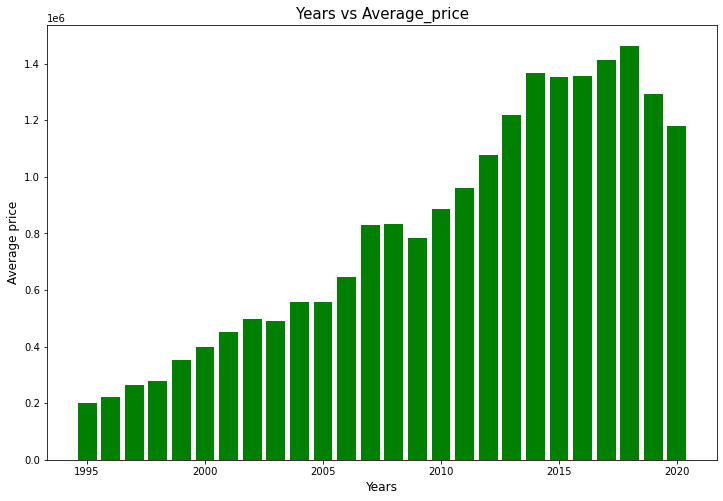

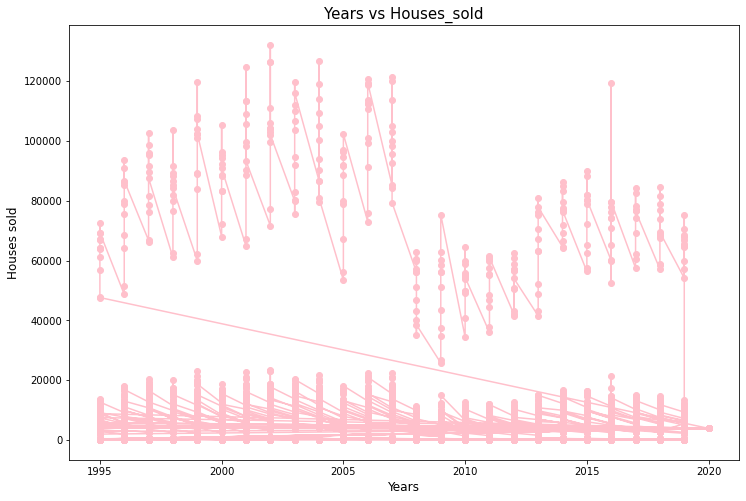

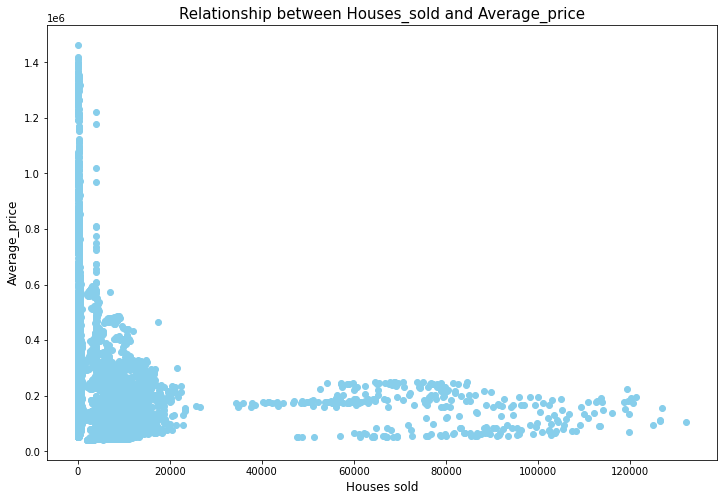

In [29]:
class DataFramePlotter:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def bar_plot(self, x, y, title="Bar Plot", xlabel="X-axis", ylabel="Y-axis", figsize=(12, 8)):
        plt.figure(figsize=figsize)
        plt.bar(self.dataframe[x], self.dataframe[y],color='green')
        plt.title(title, fontsize=15)
        plt.xlabel(xlabel, fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        plt.show()
    
    def line_plot(self, x, y, title="Line Plot", xlabel="X-axis", ylabel="Y-axis", figsize=(12, 8)):
        plt.figure(figsize=figsize)
        plt.plot(self.dataframe[x], self.dataframe[y], marker='o', color='pink')
        plt.title(title, fontsize=15)
        plt.xlabel(xlabel, fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        plt.show()

    def scatter_plot(self, x, y, title="Scatter Plot", xlabel="X-axis", ylabel="Y-axis", figsize=(12, 8)):
        plt.figure(figsize=figsize)
        plt.scatter(self.dataframe[x], self.dataframe[y], color='skyblue')
        plt.title(title, fontsize=15)
        plt.xlabel(xlabel, fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        plt.show()

# Example usage
df1 = pd.DataFrame(df)

# Initialize the plotter with the DataFrame
plotter = DataFramePlotter(df1)

# Create different plots
plotter.bar_plot(x='Years', y='average_price', title='Years vs Average_price',xlabel='Years', ylabel='Average price')
plotter.line_plot(x='Years', y='houses_sold', title='Years vs Houses_sold',xlabel='Years', ylabel='Houses sold')
plotter.scatter_plot(x='houses_sold', y='average_price', title='Relationship between Houses_sold and Average_price',xlabel='Houses sold', ylabel='Average_price')

In [27]:
df.groupby('Years')['houses_sold'].mean()

Years
1995    3179.544444
1996    3863.774886
1997    4388.992593
1998    4208.756436
1999    4809.274074
2000    4472.555556
2001    4929.300000
2002    5324.629630
2003    4914.588889
2004    5022.622222
2005    4202.474074
2006    5261.222222
2007    5050.937037
2008    2550.033333
2009    2459.422222
2010    2660.870370
2011    2649.511111
2012    2697.759259
2013    3229.777778
2014    3789.492593
2015    3746.870370
2016    3683.033333
2017    3601.770370
2018    3415.275926
2019    3236.310622
2020    3893.994129
Name: houses_sold, dtype: float64

Text(0, 0.5, 'Houses_sold')

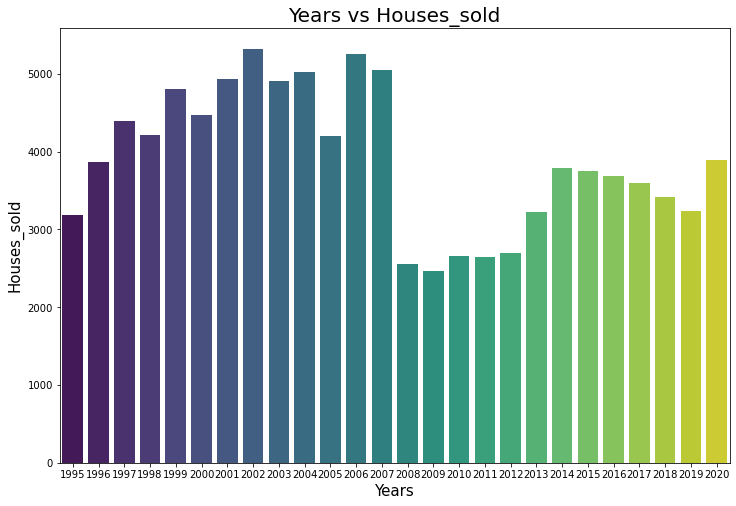

In [28]:
plt.figure(figsize=(12, 8))  # Width, Height in inches
sns.barplot(x='Years', y='houses_sold', data=df, ci=None, palette='viridis')
plt.title('Years vs Houses_sold', fontsize=20)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Houses_sold', fontsize=15)